## Introduction

### Complexity of *Natural History* 

Pliny the Elder's *Natural History* is widely recognized as one of the earliest encyclopedias in the world, representing a pioneering effort in comprehensively cataloging the vast array of human knowledge from that era. 

The work is thematically divided into 37 books, focusing on different subjects including astronomy, geography, zoology, botany, medicine, and more. Pliny meticulously consulted a wide range of Greek and Roman references, amassing approximately 2,000 volumes, and interwove his own literary interpretation or moral judgements to the encyclopedic texts.

Despite the carefully designed knowledge-ordering framework, scholars noted a paradoxical complexity in *Natural History* in its linguistic style, narrative approach, and use of references. The work compiles inconsistent toponyms from Greek and Latin, includes digressions in descriptions, exhibits changes in vocabularies and sentence structures. However, it is precisely this complexity that makes the work fascinating and provides valuable insights into Pliny's conceptualization, imagination, and even the imperial ideology prevalent in his era.

### State-of-art

The work's complexity is further highlighted by Naas (2004), who discusses the encyclopedic project of Pliny the Elder, highlighting the intentional categorization and interconnectivity of the work
1
. Pinkster (2015) also points out that every thematic unity in "Natural History" must be understood in the context of the work's overall structure
3
. Rydberg-Cox (2021) explores the sources and topics of Pliny's "Naturalis Historia" through distant reading methods, highlighting the work's complexity and interconnectivity
2
.

refreshingly approach to the text pointing the complexity and interconnectivity of the general structure of the work (for instance, Naas, V. (2004). Le projet encyclopédique de Pline l'Ancien. Roma: École française de Rome.). Previous distant reading approaches to the text: Rydberg-Cox, J. (2021). “Modeling the Sources and Topics of Pliny’s Naturalis Historia.” Umanistica Digitale 11, 217-229.

## Research Question

### Geographical scope in *Natural History*

Rooted in the inheritance of geographical knowledge from Greek treatises, the Roman Empire's exploration and territorial expansion fostered the development of a unique Roman outlook on geography. Pliny's *Natural History* emerges from this context, representing a profound synthesis of diverse geographical sources. Drawing upon sailing maps, expedition notes, and thriving Roman geographical scholarship, Pliny seamlessly connects the volumes dedicated to geography (books 3-6) with broader elements, aspects, and various cultural, historical, and societal contexts explored in the subsequent volumes.

The most obvious examples are the concrete geographical locations mentioned in the texts. In the descriptions of origins of exotic plants, communities' habitats, paths of imperial expeditions and trade ventures, and comparisons to the climates and products with that of Roman empire, the geographical names serve as signposts within the vast expanse of *Natural History*, guiding readers through diverse lands and illuminating the diverse experiences and knowledge associated with each place. 

And the portrayal and depiction of the places, particularly those located far beyond the borders of the Roman Empire, shed a light on the ways in which Pliny the Elder and his contemporaries perceived and conceptualized the world around them.

### Spatial perspective
Centrality of geography to distribute information and locate knowledge and events.



In this regards, this analysis aims to map the physical locations mentioned in the books, also contributing to define their role and position in the network of interconnections within Pliny's work.

The exploration is conducted combining two different methodologies of Natural Language Processing, in order to have an overview of the discourse about "India" in *Natural History* of Pliny the Elder.

### Focus on India
It emerges in the top 10 places mentioned in the text; it has been already highlighted that the NH is a source of information of the interest of Rome for India (bibliography)

### Discourse about India in Natural History

What information is provided about India? What Indian places are described? How is India described? How is this information structured?

## Methodology
Description of the workflow

## Data preparation

### ToposText



The original text was written in Latin, and in the 

 the English version translated by Henry T. Riley (1816-1878) and John Bostock (1773-1846), first published 1855, text from the Perseus Project, licensed under a Creative Commons Attribution-Share-Alike 3.0 U.S. License is used for exploration in the thesis.
 
 containing 797810 tokens and 34548 types, with a scope of encyclopedia in the following structure:

### Description of the dataset of place names 

### Description of the dataset of textual passages related to ‘India’ and ‘Indian places’ (seize of the corpus: how many tokens?) – check the indication in the pdf file for the coordinates of the India region.

Texts mentioning regions related to "India" in the context were extracted with a range of coordinates referring to Barrington Atlas of the Greek and Roman World by R. J.A. Talbert.

### Manual check (by close reading) of the passages in the dataset: are all the Indian places mentioned in these passages correctly annotated in ToposText?

### Tokenization, lemmatization, remove stop words

In [1]:
#| echo: false

# libraries imported

from bs4 import BeautifulSoup
import future
import pandas as pd
import csv
import itertools
import uuid
import requests
import re
from IPython.display import display, Markdown
from tqdm import tqdm
tqdm.pandas()

### Scrape text with geographical annotation

The text of the whole book has been digitized and annotated with people’s name, places’ name and coordinates by [TOPOSText project](https://topostext.org/the-project) since 2012. This invaluable resource allows for the creation of a dataset that includes both the textual contents and geographical annotations, which can be utilized to investigate the distribution of place names in the entire text and examine the frequencies and patterns of geographically-related content.

In [2]:
#| code-fold: false

# link for digitized text of Natural History_book1-11
url1 = "https://topostext.org/work/148"

# link for digitized text of Natural History_book12-37
url2 = "https://topostext.org/work/153"

The geographical annotations can be parsed with functions available in [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library, and the first five returned annotations are shown as follows: 

In [3]:
# check the place names with annotation in the first part of the digitized book

response = requests.get(url1)
soup = BeautifulSoup(response.content, features="lxml")

links = soup.find_all("a", {"class": "place"})

for link in links[:5]:
    print(link)

<a about="https://topostext.org/place/380237SAca" class="place" lat="37.992" long="23.707">Academy</a>
<a about="https://topostext.org/place/419125LPal" class="place" lat="41.8896" long="12.4884">Palatine</a>
<a about="https://topostext.org/place/419125LEsq" class="place" lat="41.895" long="12.496">Esquiline</a>
<a about="https://topostext.org/place/419125SCap" class="place" lat="41.8933" long="12.483">Capitol</a>
<a about="https://topostext.org/place/419125PRom" class="place" lat="41.891" long="12.486">Rome</a>


With defining a function, all the texts with the geographical annotations can be parsed and stored as a dataframe, containing information in 8 columns as:

1. Unique ID assigned </br>
2. ToposText_ID (which identifies the distinct location) </br>
3. Place name </br>
4. Reference (indicate where the place name occurs in the book) </br>
5. Latitude </br>
6. Longitude </br>
7. Book number the place mentioned in </br>
8. Chapter number the place mentioned in </br>
9. Paragraph number the place mentioned in </br>
10. Plain text of the paragraph where the place is mentioned </br>

In [4]:
#| df-print: tibble

# function for text with geographical name annotation scraping

def toposgeotext(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise FileNotFoundError("Failed to retrieve HTML content: " + url)

    data = []
    soup = BeautifulSoup(response.content, features="lxml")
    links = soup.find_all("a", {"class": "place"})

    for link in links:
        Place_Name = link.contents[0]  # Place name
        ToposText_ID = link.get('about')  # ToposText ID
        Lat = link.get('lat')
        Long = link.get('long')
        Parent = link.find_parent("p")
        Text = Parent.text  # Extract related text
        Reference = Parent.get("id")  # Indicate book, chapter, paragraph

        # Separate the information in Text using the regular expression pattern
        match = re.search(r'§\s+(\d+\.\d+\.\d*)\s+(.*)$', Text)
        if match:
            Chapternparagraph = match.group(1)  # Extract the reference from the pattern
            Text = match.group(2)  # Extract the remaining text from the pattern
            
            # Extract the book, chapter, and paragraph components
            book, chapter, paragraph = Chapternparagraph.split('.')
            
            UUID4 = uuid.uuid4()  # Create a unique ID

            data.append({
                'UUID4': UUID4,
                'ToposText_ID': ToposText_ID,
                'Place_Name': Place_Name,
                'Reference': Reference,
                'Lat': Lat,
                'Long': Long,
                'Book': book,  # Add the book component to the DataFrame
                'Chapter': chapter,  # Add the chapter component to the DataFrame
                'Paragraph': paragraph,  # Add the paragraph component to the DataFrame
                'Text': Text
            })

    df = pd.DataFrame(data)
    # Convert data types to numeric
    df['Book'] = pd.to_numeric(df['Book'], errors='coerce')
    df['Chapter'] = pd.to_numeric(df['Chapter'], errors='coerce')
    df['Paragraph'] = pd.to_numeric(df['Paragraph'], errors='coerce')
    return df

# construct the dataframe for two parts of the digitized text with geographical annotations with the toposgeotext function
geodf1 = toposgeotext(url1)
geodf2 = toposgeotext(url2)

geotext_whole = pd.concat([geodf1, geodf2], ignore_index=True)

geotext_whole.to_csv('geotext_whole.csv')

geotext_whole.head()

UUID4  \
0  f8bbe55f-283c-49a2-ac89-35e0b24b46fe   
1  a804496a-f5b4-4359-abfe-a19f43ca58ba   
2  2d69bd88-f0f7-411c-9261-989e4575cdcc   
3  3e44e671-8506-46b5-9d1f-6bb9179427bd   
4  18d4d160-548b-4f2e-a2ba-481cbe7b29c3   

                             ToposText_ID Place_Name  \
0  https://topostext.org/place/380237SAca    Academy   
1  https://topostext.org/place/419125LPal   Palatine   
2  https://topostext.org/place/419125LEsq  Esquiline   
3  https://topostext.org/place/419125SCap    Capitol   
4  https://topostext.org/place/419125PRom       Rome   

                               Reference      Lat     Long  Book  Chapter  \
0  urn:cts:latinLit:phi0978.phi001:1.8.1   37.992   23.707     1        8   
1  urn:cts:latinLit:phi0978.phi001:2.5.1  41.8896  12.4884     2        5   
2  urn:cts:latinLit:phi0978.phi001:2.5.1   41.895   12.496     2        5   
3  urn:cts:latinLit:phi0978.phi001:2.5.1  41.8933   12.483     2        5   
4  urn:cts:latinLit:phi0978.phi001:2.6.3   41.891   12.486     2        6   

   Paragraph                                               Text  
0        1.0  For my own part I frankly confess that my work...  
1        1.0  For this reason I deem it a mark of human weak...  
2        1.0  For this reason I deem it a mark of human weak...  
3        1.0  For this reason I deem it a mark of human weak...  
4        3.0  Below the sun revolves a very large star named...

In [5]:
#| echo: false

loc_book1 = len(geodf1)
loc_book2 = len(geodf2)
geoshape = geotext_whole.shape

display(Markdown("""There are {loc_book1} locations mentioned in book 1-11 and {loc_book2} locations mentioned in book 12-37.
The combined dataframe for the whole book, has the shape of {geoshape}.
And the output has been stored as .csv for record.""".format(loc_book1 = loc_book1, loc_book2 = loc_book2, geoshape = geoshape)))

There are 5595 locations mentioned in book 1-11 and 3281 locations mentioned in book 12-37.
The combined dataframe for the whole book, has the shape of (8876, 10).
And the output has been stored as .csv for record.

### Scrape text of the entire book

The text of the entire book is also scraped as a reference.

In [6]:
# function for scraping entire text from ToposText with given html

def topostext(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise FileNotFoundError("Failed to retrieve HTML content: " + url)
    
    data = []
    soup = BeautifulSoup(response.content, features="lxml")
    links = soup.find_all("p")  # Find all <p> tags instead of filtering by class

    for link in links:
        match = re.search(r'§\s+(\d+\.\d+\.\d*)\s+(.*)$', link.text)
        if match:
            Chapternparagraph = match.group(1)  # Extract the reference from the pattern
            # Extract the book, chapter, and paragraph components
            book, chapter, paragraph = Chapternparagraph.split('.')
            Text = match.group(2)  # Extract the text from the pattern
            Reference = link.get("id")  # Indicate book, chapter, paragraph
            UUID4 = uuid.uuid4()  # Create a unique ID

            data.append({
                'UUID4': UUID4,
                'Reference': Reference,
                'Book': book,  # Add the book component to the DataFrame
                'Chapter': chapter,  # Add the chapter component to the DataFrame
                'Paragraph': paragraph,  # Add the paragraph component to the DataFrame     
                'Text': Text
            })

    df = pd.DataFrame(data)
    # Convert data types to numeric
    df['Book'] = pd.to_numeric(df['Book'], errors='coerce')
    df['Chapter'] = pd.to_numeric(df['Chapter'], errors='coerce')
    df['Paragraph'] = pd.to_numeric(df['Paragraph'], errors='coerce')
    return df

# construct the dataframe for two parts of the digitized text with the topostext function
df1 = topostext(url1)
df2 = topostext(url2)

# combine the two parts of scraped text
wholebook = pd.concat([df1, df2], ignore_index=True)

# store the sparsed text into csv file
wholebook.to_csv('wholebooktext.csv')

wholebook.head()

UUID4  \
0  9dc3ebec-2788-41d5-aae7-c5822472d873   
1  5a3b400b-e2fe-42e0-b8e8-425b69257ae0   
2  3e6bdc07-568b-43ae-8ebd-537355f33d4f   
3  88f9960b-bf90-40da-b140-48344acaf23e   
4  95522a01-f6dd-43ea-94b0-82eacc2b3a8f   

                               Reference  Book  Chapter  Paragraph  \
0  urn:cts:latinLit:phi0978.phi001:1.1.1     1        1        1.0   
1  urn:cts:latinLit:phi0978.phi001:1.2.1     1        2        1.0   
2  urn:cts:latinLit:phi0978.phi001:1.3.1     1        3        1.0   
3  urn:cts:latinLit:phi0978.phi001:1.4.1     1        4        1.0   
4  urn:cts:latinLit:phi0978.phi001:1.5.1     1        5        1.0   

                                                Text  
0  PREFACE IN THE FORM OF A LETTER: PLINIUS SECUN...  
1  But who could judge the value of these composi...  
2  But if Lucilius, the originator of critical sn...  
3  My own presumption has indeed gone further, in...  
4  For my own part I am of opinion that a special...

In [422]:
#| echo: false

wholeshape = wholebook.shape

display(Markdown("""The combined dataframe for texts in the whole book has the shape of {wholeshape}.
And the output has been stored as .csv for record.""".format(wholeshape = wholeshape)))


The combined dataframe for texts in the whole book has the shape of (3493, 6).
And the output has been stored as .csv for record.

In [18]:
from collections import Counter
import nltk
nltk.download('punkt')

def tokencounter(df):
    df['tokens'] = df['Text'].apply(nltk.word_tokenize)
    all_tokens = [token for sublist in df['tokens'] for token in sublist]
    
    token_counts = len(all_tokens)
    type_counts = len(set(all_tokens))
    
    return token_counts, type_counts
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dawn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
tokencounter(wholebook)

(797810, 34548)

In [20]:
tokencounter(geotext_whole)

(2812850, 28405)

In [21]:
tokencounter(geotext_india)

C:\Users\dawn\AppData\Local\Temp\ipykernel_2724\3227109280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['Text'].apply(nltk.word_tokenize)


(85665, 6608)

## Data Analysis

### Word frequency

### Topic modelling

### Network analysis for Named Entity

## Conclusions

## Old structure

### Overview of geographical related texts

What topics popped up from the context of place names?

#### Distribution of place names in the entire book

The normalized frequency of place name references in *Natural History* was calculated as the ratio of counts of the occurrences of place names in each book to the word lengths of the book (@tbl-place_book_distribution). As depicted in @fig-place_distribution, the findings indicate that books 3-6 prominently feature a higher frequency of place name references. This observation is consistent with content structure of *Natural History*, that books 3-6 centered around the themes of **"Geography and ethnography"**, is expected to contain a great number of location references.

In [60]:
#| label: tbl-place_book_distribution
#| tbl-cap: Distribution of place names in Natural History
#| df-print: tibble

# Group the items by "Book" and calculate the total word length

book_word_lengths = wholebook.groupby('Book')['Text'].apply(lambda x: x.str.split().str.len().sum()).reset_index()
book_word_lengths.columns = ['Book', 'Total_length']
# Set the "Book" column as the index
book_word_lengths.set_index('Book', inplace=True)

place_counts = geotext_whole['Book'].value_counts().reset_index()
place_counts.columns = ['Book', 'Place_count']
place_counts.set_index('Book', inplace=True)

place_distribution = book_word_lengths.merge(place_counts, on='Book')
place_distribution['Place_freq'] = place_distribution['Place_count']/place_distribution['Total_length']

place_distribution

Total_length  Place_count  Place_freq
Book                                       
1             2778            1    0.000360
2            30570          406    0.013281
3            18037         1007    0.055830
4            15434         1309    0.084813
5            18872         1112    0.058923
6            27890         1012    0.036285
7            21204          225    0.010611
8            24176          185    0.007652
9            19197          140    0.007293
10           20816          121    0.005813
11           27345           77    0.002816
12           13906          188    0.013519
13           13243          164    0.012384
14           15277          189    0.012372
15           14552          135    0.009277
16           25442          180    0.007075
17           29387           82    0.002790
18           35850          222    0.006192
19           18822          146    0.007757
20           22743           21    0.000923
21           17896           95    0.005308
22           16491           24    0.001455
23           15764           17    0.001078
24           17491           56    0.003202
25           16734           85    0.005079
26           15448           35    0.002266
27           12444           40    0.003214
28           26476           28    0.001058
29           13976           31    0.002218
30           14395           23    0.001598
31           12204          222    0.018191
32           14635           76    0.005193
33           17946          113    0.006297
34           18972          193    0.010173
35           21282          277    0.013016
36           21295          357    0.016764
37           22255          282    0.012671

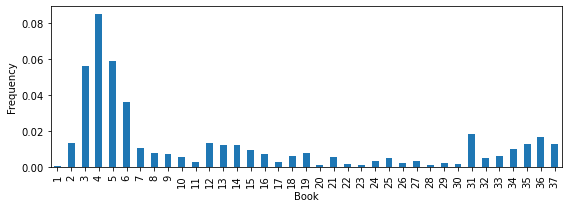

In [105]:
#| label: fig-place_distribution
#| fig-cap: Place name distribution in Natural History

fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figsize to increase the plot size

place_distribution['Place_freq'].plot.bar(ax=ax)
plt.xlabel('Book')
plt.ylabel('Frequency')

# Adjust the plot alignment
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Change the rect values to adjust the alignment

plt.show()

#### Topic modelling on geographical location related text

[Genism](https://radimrehurek.com/gensim/) library is used for semantic vectorization and implemetion of  Latent Dirichlet Allocation (LDA) model for the topic modelling in the captioned text. 

And the library of [pyLDAvis](https://pyldavis.readthedocs.io/en/latest/index.htmlgenism) is applied for an interactive visualization.

In [252]:
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def tokenize_paragraphs(texts):
    ## apply word tokenization function of NLTK module to each paragraph
    words = [word_tokenize(text, language='English') for text in texts]
    
    
    ## set list of stop words to be excluded from the tokenlist with stopwords function in NLTK
    stop_words = set(stopwords.words('English'))
    
    lemmatizer = WordNetLemmatizer()
    
    ## append words of text into a tokenlist
    tokenlistpara = []
    for paragraph in words:
        paragraph_tokens = []
        for token in paragraph:
            if token.lower() and token.lower() not in stop_words and len(token.lower()) > 2:
                ## lemmatize the tokens
                lemmatized_token = lemmatizer.lemmatize(token.lower())
                paragraph_tokens.append(lemmatized_token)
        tokenlistpara.append(paragraph_tokens)
    return tokenlistpara


para = tokenize_paragraphs(geotext_whole['Text'].drop_duplicates())

## import the necessary modules

from gensim import corpora, models
import gensim

# turn our tokenized documents into a id <-> term dictionary
paradictionary = corpora.Dictionary(para)

# convert tokenized documents into a document-term matrix
paracorpus = [paradictionary.doc2bow(text) for text in para]

# generate LDA model with tokenlist in paragraphs 
paraldamodel = gensim.models.ldamodel.LdaModel(paracorpus, num_topics=5, id2word = paradictionary, passes=20)

## display the assigned 5 topics and 30 words in each topic
from pprint import pprint
pprint(paraldamodel.print_topics(num_topics=5, num_words=30))

[(0,
  '0.010*"also" + 0.004*"picture" + 0.003*"painted" + 0.003*"milk" + '
  '0.003*"sponge" + 0.003*"first" + 0.003*"dung" + 0.003*"bird" + 0.002*"egg" '
  '+ 0.002*"made" + 0.002*"time" + 0.002*"horse" + 0.002*"year" + '
  '0.002*"caesar" + 0.002*"painting" + 0.002*"one" + 0.002*"goat" + '
  '0.002*"said" + 0.002*"two" + 0.002*"called" + 0.002*"give" + 0.002*"boy" + '
  '0.002*"onion" + 0.002*"among" + 0.002*"day" + 0.002*"great" + 0.002*"sheep" '
  '+ 0.002*"make" + 0.002*"famous" + 0.001*"wine"'),
 (1,
  '0.018*"also" + 0.011*"kind" + 0.007*"called" + 0.007*"stone" + 0.007*"like" '
  '+ 0.006*"wine" + 0.006*"colour" + 0.006*"leaf" + 0.006*"one" + '
  '0.005*"plant" + 0.005*"tree" + 0.005*"used" + 0.005*"water" + 0.005*"found" '
  '+ 0.005*"white" + 0.005*"root" + 0.004*"taken" + 0.004*"made" + '
  '0.004*"variety" + 0.004*"oil" + 0.004*"name" + 0.004*"seed" + 0.004*"black" '
  '+ 0.003*"make" + 0.003*"grows" + 0.003*"even" + 0.003*"honey" + '
  '0.003*"juice" + 0.003*"said" + 0.00

The text data undergoes tokenization and lemmatization using functions from the [NLTK](https://www.nltk.org/) package. This preprocessing step aims to obtain meaningful words that facilitate the inference of potential topics based on grouped keywords. To ensure the modeling results consist of words with descriptive meaning, stop words in English are excluded, along with tokens having a length less than 2, when preparing the corpus for input into the LDA module.

After several tryouts, the number of topics is set to 5, and the passes is set to 20, in order to generate distinct and non-overlapping topic clusters.

The following visualization presents the top 30 keywords for each topic, along with their respective weights, which rank their contributions to the topic.

In [253]:
# label: fig-geotexttm
# fig-cap: Topic modelling of place names related text

import pyLDAvis
import pyLDAvis.gensim_models

# Convert the LdaModel object to a pyLDAvis-compatible format
vis_datapara = pyLDAvis.gensim_models.prepare(paraldamodel, paracorpus, paradictionary, R=30, sort_topics=False)

# Enable the Jupyter notebook inline display of visualizations
pyLDAvis.enable_notebook()

# Display the pyLDAvis visualization with adjusted size
pyLDAvis.display(vis_datapara)


C:\Users\dawn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In the left panel of the above interactive chart, each bubble represents a topic, and the size of the bulbble indicates the percentage of the texts in the corpus contributing to the topic. The distance between the bubbles implies the extent of difference between them. And a good topic model is expected to have big and non-overlapping bubbles scattered throughout the chart [@tran2022].  

And in the right panel, the blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed. When hovering on the bubbles in the left panel, there will be red bars in the right panel giving the estimated number of times a given term was generated by a given topic. The word with the longest red bar is estimated to be used the most in the texts belonging to that topic. 

An intriguing observation about the overall result of the topic modelling is that the word "also" comprises a large protion in the given text, and appears in all assigned topics. Taking the encyclopedia scope of Natural History into consideration, it may imply that the place names are prone to be mentioned in a context of enumerason and comparison. In the literary studies by @pollard2009 and @murphy2003, Pliny gave a critical description of the geographical surroundings and their exotic counterparts (e.g., Po River and Nile River), which may confirms it worthwhile getting a deeper exploration in the usage and reference of the place names in Natual History in order to map the scope and vision he attempted to display in the encyclopedia by Pliny the Elder.

More specifically, a rough generalization can be drown for each topic with the dominant words in it as follows, which may help to conclude the themes and keywords for geography related context in *Natural History*.

Topic 1: **Artistic Elements and Objects** - The presence of paintings, milk, sponges, and other objects adds to the artistic and visual aspects of the context.

Topic 2: **Botanical and Natural Elements** - Various plants, trees, colors, and natural materials contribute to the botanical richness depicted in the book.

Topic 3: **Geographic Features and Places** - Islands, rivers, cities, and other geographical features play a significant role in the narrative, highlighting the diverse landscapes explored in the text.

Topic 4: **Distance and Proximity** - Distances, towns, rivers, and seas provide insights into the spatial relationships and navigational aspects within the book.

Topic 5: **Historical and Cultural References** - Roman history, statues, temples, and notable figures showcase the historical and cultural context prevalent in the book.

In addition, as shown in the visualization chart, the Topic 5: **Historical and Cultural References** and Topic 2: **Botanical and Natural Elements** seem to be the most prominent topics about geographical location related text in *Natural History*.

In conclusion, the general exploratory analysis about geographical location related text in *Natural History* shows that in the books about geography and ethnography, and mining and mineralogy, place names are most frequently referred. And the potential topics about geograpical location related contents are "Artistic Elements and Objects", "Geographic Features and Places", "Distance and Proximity", "Historical and Cultural References" and "Botanical and Natural Elements", with the latter two as the most prominent topics in the context.

Considering the comprehensive scope of *Natural History*, the presence of concrete place names provides a valuable opportunity to delve deeper into Pliny the Elder's perception and imagination of landscapes. Therefore, it is worthwhile to embark on a more detailed examination of the distribution, significance, and contextualization of place names in *Natural History* to gain insights into how Pliny the Elder crafted the narrative and conveyed his understanding of the world.

### Prominent location mentioned in Natural History

What place stands out in the narrative? And how does it align with the scope and underlying concept of *Natural History*?

#### Place name distribution

In [424]:
#| echo: false

place_number = len(geotext_whole['ToposText_ID'].unique().tolist())

display(Markdown("""
By grouping the "ToposText_ID" (as indicator for distinct geographical loactions in the text) in the earlier constructed dataframe, there are {place_number} unique places mentioned in *Natural History*.
""".format(place_number = place_number)))


By grouping the "ToposText_ID" (as indicator for distinct geographical loactions in the text) in the earlier constructed dataframe, there are 2052 unique places mentioned in *Natural History*.


The top 20 most frequent place names mentioned (as 1% of total) in *Natural History* is shown in @tbl-topplace.

In [277]:
#| label: tbl-topplace
#| tbl-cap: Top 20 mentioned place names in Natural History
#| df-print: tibble

## sort the top 1% places referred in descending order

place = geotext_whole.groupby('ToposText_ID')[['Place_Name','Lat','Long']].value_counts().reset_index(name='Count')
sorted_place = place.sort_values(by='Count', ascending=False)
top_count = sorted_place.iloc[19]['Count']
topplace = sorted_place[sorted_place['Count'] >= top_count]
topplace

ToposText_ID Place_Name      Lat      Long  \
1687  https://topostext.org/place/406163RIta      Italy     40.6      16.3   
2034  https://topostext.org/place/419125PRom       Rome   41.891    12.486   
52    https://topostext.org/place/271307REgy      Egypt     27.1      30.7   
82    https://topostext.org/place/300740RInd      India       30        74   
57    https://topostext.org/place/280400RAra     Arabia       28        40   
320   https://topostext.org/place/355390RSyr      Syria     35.5        39   
255   https://topostext.org/place/350330RCyp     Cyprus       35        33   
109   https://topostext.org/place/312301WNil       Nile  30.0918   31.2313   
2282  https://topostext.org/place/441073LAlp       Alps   44.142     7.343   
766   https://topostext.org/place/376145RSic     Sicily     37.6      14.5   
275   https://topostext.org/place/352252IKre      Crete  35.2052   25.1836   
7     https://topostext.org/place/130350REth   Ethiopia    13.01     35.01   
417   https://topostext.org/place/364282IRho     Rhodes  36.4408   28.2244   
966   https://topostext.org/place/380237PAth     Athens  37.9718  23.72793   
2043  https://topostext.org/place/419125SCap    Capitol  41.8933    12.483   
298   https://topostext.org/place/353403WEup  Euphrates  35.2791   40.2708   
2241  https://topostext.org/place/435335WPon     Pontus     43.5      33.5   
1839  https://topostext.org/place/411146RCam   Campania     41.1      14.6   
1480  https://topostext.org/place/397443RArm    Armenia   39.702    44.298   
17    https://topostext.org/place/195390WEry    Red Sea     19.5        39   
545   https://topostext.org/place/369103PCar   Carthage    36.85     10.32   
602   https://topostext.org/place/370340RCil    Cilicia    37.01     34.01   

      Count  
1687    292  
2034    269  
52      261  
82      167  
57      123  
320     109  
255      85  
109      85  
2282     82  
766      71  
275      64  
7        58  
417      56  
966      56  
2043     52  
298      47  
2241     47  
1839     46  
1480     45  
17       42  
545      42  
602      42

The place names referenced in Natural History are geographically mapped, with each location marked on the map using its corresponding coordinates. A dot is assigned to represent each place, with the size and color of the dot reflecting the frequency of its mention in the book. The larger and darker the dot, the more frequently the place is referenced within the context of *Natural History*.  

An intriguing observation from the output, as depicted in @fig-geonamemap, is the prominence of India—a region outside the Mediterranean—despite its high frequency of mentions.

In [425]:
#| label: fig-geonamemap
#| fig-cap: Place name distribution map

import folium
from branca.colormap import LinearColormap

# Create a Folium map centered on a specific location
map = folium.Map(location=[32, 53], zoom_start=3)

# Define the minimum and maximum count values for the color scale
min_count = place['Count'].min()
max_count = place['Count'].max()

# Create a color map based on the count values
color_map = LinearColormap(colors=['#FFCC00', '#FF6600'],
                           vmin=min_count,
                           vmax=max_count)

# Iterate over each row in the dataframe
for index, row in place.iterrows():
    place_name = row['Place_Name']
    count = row['Count']
    latitude = row['Lat']
    longitude = row['Long']
    
    # Get the color based on the count using the color map
    color = color_map(count)
    
    # Create a circle marker with a size based on the count and color based on the count
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=count/10,  # Adjust the size of the marker based on the count
        weight=0,
        fill=True,
        fill_color=color,
        fill_opacity=1,
        tooltip=f'{place_name}: {count} counts'
    ).add_to(map)

# Add the color scale to the map
color_map.caption = 'Count'
color_map.add_to(map)

# Display the map
map

#### Zooming into "India"

As highlighted in the research conducted by @nappo2017, the era of Pliny the Elder's writing of *Natural History* witnessed a thriving Indo-Roman trade relationship. The prominence of the term "India" within the text suggests that this trade connection holds considerable significance in the narrative of *Natural History*.

To provide more comprehensive contextual analysis, the focus is extended beyond solely "India" to the regions that encompass the empires of the Indian subcontinent. The approximate range of coordinates defining the target region is as follows:^[Given the challenges in determining the precise coordinates of the Empires in the Indian region during the 1st century AD, an approximate range of coordinates for the current Indian subcontinent is used as a rough estimation.]

Latitude:
Northernmost point: Approximately 37.6 degrees North (located in the region of Jammu and Kashmir in India)
Southernmost point: Approximately 5.5 degrees North (located in the region of Dondra Head in Sri Lanka)

Longitude:
Westernmost point: Approximately 60.9 degrees East (located in the region of Gwadar in Pakistan)
Easternmost point: Approximately 97.4 degrees East (located in the region of Kibithu in India)

And a dataframe for Indian subcontinent related texts can be filetered with the captioned coordinates range. 

In [11]:
#| df-print: tibble

# convert the 'Lat' and 'Long' information in the original dataframe to numeric format
geotext_whole['Lat'] = geotext_whole['Lat'].astype(float)
geotext_whole['Long'] = geotext_whole['Long'].astype(float)

# define the filter range of latitude and longitude ranges for Indian subcontinent
lat_range = (5.5, 37.6)
long_range = (60.9, 97.4)

# create a boolean mask for filtering
mask = (geotext_whole['Lat'].between(*lat_range)) & (geotext_whole['Long'].between(*long_range))

# apply the mask to filter the dataframe
geotext_india = geotext_whole[mask]
geotext_india.to_csv('geotext_indianregion.csv')

geotext_india.head()

UUID4  \
85   30629c68-c5a2-45ec-9c6e-ae2e0ceaecab   
92   958f3c3d-bbfc-4488-8009-0185494ace05   
93   11517672-3e13-4fcc-ac4a-f7ce58f814a7   
218  617dbd2d-e1cf-4858-91b4-ed6a959c9cee   
326  c2dad95b-6687-4cca-9482-4c449fafdd88   

                               ToposText_ID Place_Name  \
85   https://topostext.org/place/300740RInd      India   
92   https://topostext.org/place/300740RInd      India   
93   https://topostext.org/place/300740RInd      India   
218  https://topostext.org/place/254683WInd      Indus   
326  https://topostext.org/place/340670RBac    Bactria   

                                   Reference      Lat     Long  Book  Chapter  \
85    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
92    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
93    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
218   urn:cts:latinLit:phi0978.phi001:2.98.1  25.4487  68.3192     2       98   
326  urn:cts:latinLit:phi0978.phi001:2.110.1  36.7680  66.9010     2      110   

     Paragraph                                               Text  
85         1.0  Similarly it is reported that at the town of S...  
92         1.0  Similarly it is reported that at the town of S...  
93         1.0  Similarly it is reported that at the town of S...  
218        1.0  Near the town of Harpasa in Asia stands a jagg...  
326        1.0  But among mountain marvels — Etna always glows...

In [12]:
#| echo: false

indiatext_shape = geotext_india.shape

display(Markdown("""
The shape of the filtered dateframe for texts and place coordinates related to Indian subcontinent is {indiatext_shape}. 
And the dataframe is also saved as .csv for further reference.
""".format(indiatext_shape = indiatext_shape)))


The shape of the filtered dateframe for texts and place coordinates related to Indian subcontinent is (241, 10). 
And the dataframe is also saved as .csv for further reference.


In [291]:
#| echo: false

distinct_places = geotext_india['Place_Name'].unique()

# check the distinct place names in the selected region
display(Markdown("""
And the places refered in the captioned region in the data frame are: {distinct_places}.""".format(distinct_places = distinct_places)))


And the places refered in the captioned region in the data frame are: ['India' 'Indus' 'Bactria' 'Ganges' 'Acesinus' 'Oxus' 'Hydaspes'
 'Taprobane' 'Arachosia' 'Muziris' 'Baragaza' 'Aria' 'Ceylon'].

In [26]:
geotext_india_unique = geotext_india['Text'].drop_duplicates()
geotext_india_unique.to_csv('geotext_indianregion_unique.csv')

The comparison between the total number of place names and the place names specifically related to the Indian subcontinent mentioned in each book, is depicted in @fig-grouped_place_name_count_comparison. The difference in numbers between the two categories is significant, as indicated by the large disparity.

To facilitate a more effective comparison of the referencing trends across different books, @fig-subplots_place_name_count_comparison presents subplots with varying y-axis scales. This approach allows for a clearer visualization of the trends and patterns in place name references throughout the various books.

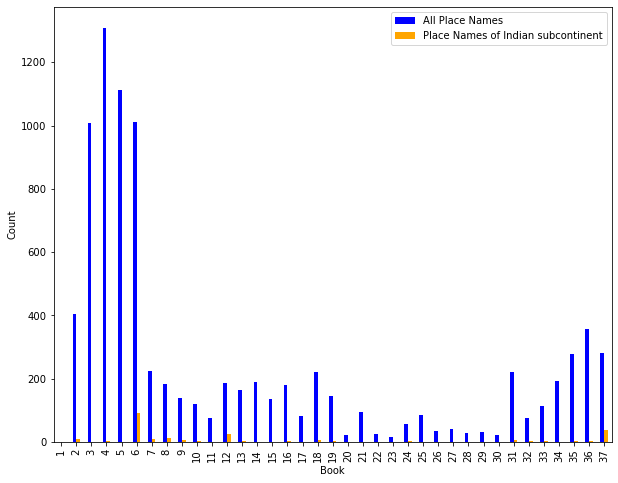

In [428]:
#| label: fig-grouped_place_name_count_comparison
#| fig-cap: Occurence count for all place names and place names of Indian subcontinent in each book

import matplotlib.pyplot as plt

# Compute the grouped count of place names in the current DataFrame
allplacecount = geotext_whole.groupby('Book')['Chapter'].count()

# Compute the grouped count of place names in the other DataFrame
indianplacecount = geotext_india.groupby('Book')['Place_Name'].count()

# Combine the counts into a single DataFrame
combined_counts = pd.concat([allplacecount, indianplacecount], axis=1)
combined_counts.columns = ['All Place Names', 'Place Names of Indian subcontinent']
combined_counts.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the combined counts as a bar chart with different colors
combined_counts.plot.bar(color=['blue', 'orange'], ax=ax)


# Customize the plot
ax.set_xlabel('Book')
ax.set_ylabel('Count')

# Show the plot
plt.show()


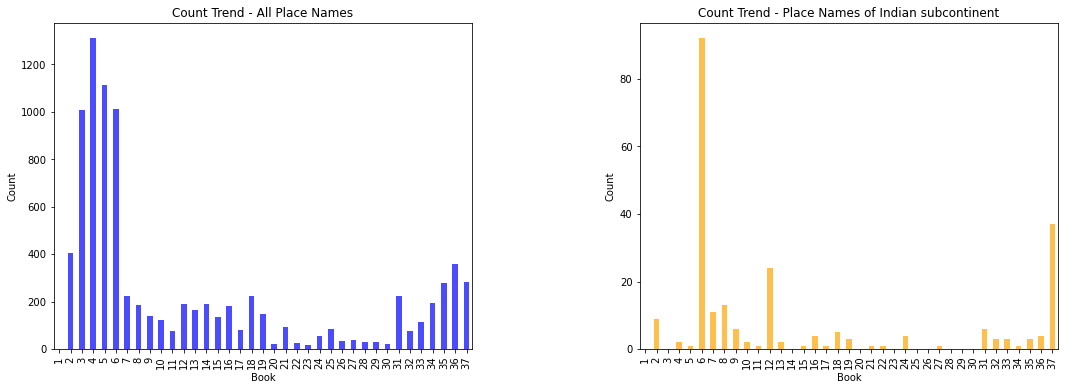

In [430]:
#| label: fig-subplots_place_name_count_comparison
#| fig-cap: Occurence count for all place names and place names of Indian subcontinent in each book_different y-axis scales 

# Set up the figure and axes for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart for 'All Place Names' on the first subplot
combined_counts['All Place Names'].plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_xlabel('Book')
ax1.set_ylabel('Count')
ax1.set_title('Count Trend - All Place Names')

# Plot the bar chart for 'Other Place Names' on the second subplot
combined_counts['Place Names of Indian subcontinent'].plot(kind='bar', ax=ax2, color='orange', alpha=0.7)
ax2.set_xlabel('Book')
ax2.set_ylabel('Count')
ax2.set_title('Count Trend - Place Names of Indian subcontinent')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

The figures reveal a distinct difference between the occurrence trends of place names related to the Indian subcontinent and all place names collectively. Specifically, the referencing of the Indian subcontinent is highly concentrated in books 6, 12, and 37 of Pliny's narrative. This discrepancy indicates that the mentioning of place names from the Indian subcontinent is closely tied to specific themes and topics within Pliny's work.

In this regard, three methodologies have been employed to analyze the texts pertaining to the Indian subcontinent in *Natural History*, including collocation analysis, topic modeling, and network analysis. The objective of these analyses is to delve deeper into the textual content, unraveling the intricate relationships and uncovering the underlying themes and connections associated with the place names of the Indian subcontinent.

Through collocation analysis, the aim is to identify significant word combinations and phrases that co-occur with the place names of the Indian subcontinent. This analysis provides insights into the specific linguistic patterns and contextual associations surrounding these locations, shedding light on their cultural, historical, and geographical significance.

Topic modeling allows for a broader exploration of the thematic landscape within which the Indian subcontinent place names are embedded. By clustering related words and identifying prevalent topics, this methodology helps to discern the major themes and subject matters that emerge from Pliny's narrative, providing a comprehensive understanding of the broader context in which these place names are referenced.

Furthermore, network analysis offers a visual representation of the interconnections among the place names of the Indian subcontinent and other entities in Pliny's work. By examining the relationships between different locations and named entities, this analysis uncovers the geographical and conceptual networks that exist within the text, revealing how the Indian subcontinent place names contribute to the overall structure and narrative flow of *Natural History*.

Together, these methodologies aim to provide a nuanced and comprehensive exploration of the texts related to the Indian subcontinent in *Natural History*. By delving into the linguistic, thematic, and network aspects of these place names, a deeper understanding of their significance and their role in shaping Pliny's narrative can be achieved.

##### Frequency list and collocations in Indian subcontinent related texts

Through the utilization of measures available in the [NLTK](https://www.nltk.org/) package, a word frequency list and a list of collocating bi-grams of the texts pertaining to the Indian subcontinent are generated to investigate potential keywords and themes of interest.

To enhance the relevance and descriptive nature of the frequency list, particular attention has been given to exclude two commonly encountered but less informative words, namely "india" and "also", from the token list. 

In [432]:
indiatokenlist = [word for paragraph in tokenize_paragraphs(geotext_india['Text'].drop_duplicates()) for word in paragraph]
indiatokenlist = [token for token in indiatokenlist if token != 'india' and token != 'also']

# apply the freqency distribution function to the token list
freq_dist = nltk.FreqDist(indiatokenlist)

# Sort the words by frequency in descending order
sorted_words = freq_dist.most_common()

# Get the frequency of the 20th word
top_count = sorted_words[188][1]

# Get all words with frequencies greater than or equal to the frequency of the 20th word
top_words = [(word, count) for word, count in sorted_words if count >= top_count]

corpus_size = len(indiatokenlist)
top_freq = len(top_words)
top_freq_ratio = round(top_freq/corpus_size*100)
top_freq_ratio

display(Markdown("""Among {corpus_size} tokens of the whole corpus for Indian subcontinent related text, 
{top_freq} (the top {top_freq_ratio}%) frequent words is filterd out and shown in @fig-freqwords_treemap and @fig-freqwords_wordcloud.""".format(corpus_size = corpus_size, top_freq = top_freq, top_freq_ratio = top_freq_ratio)))

Among 18775 tokens of the whole corpus for Indian subcontinent related text, 
197 (the top 1%) frequent words is filterd out and shown in @fig-freqwords_treemap and @fig-freqwords_wordcloud.

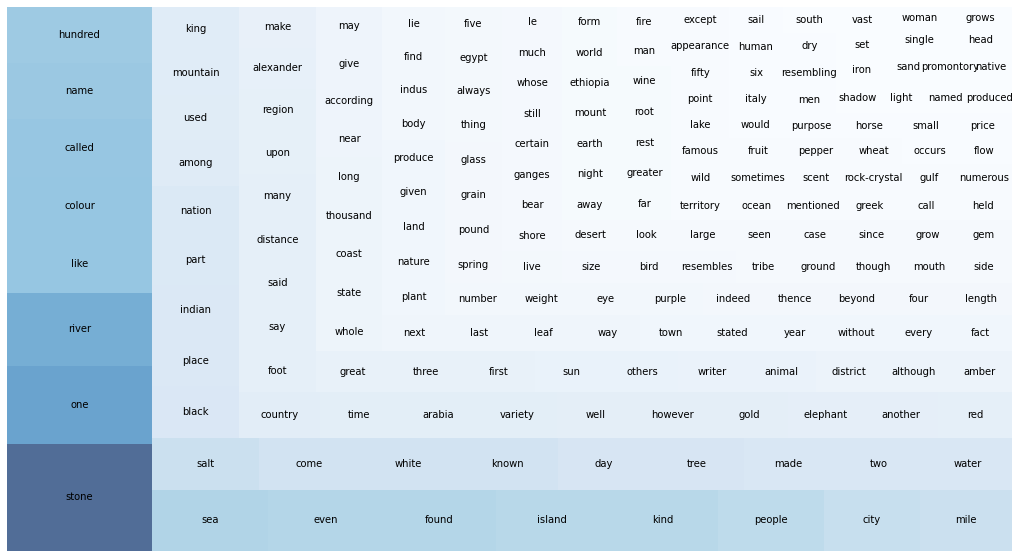

In [394]:
#| label: fig-freqwords_treemap
#| fig-cap: Top 1% frequent words in Indian subcontinent related text as tree map

import squarify
import matplotlib.cm as cm

# top_words contains the list of (word, count) tuples
labels = [word for word, _ in top_words]
sizes = [count for _, count in top_words]

# Normalize the sizes to range between 0 and 1
normalized_sizes = [(size - min(sizes)) / (max(sizes) - min(sizes)) for size in sizes]

# Define the color scale
color_scale = cm.Blues

plt.figure(figsize=(18, 10))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=color_scale(normalized_sizes))

# Add labels and title
plt.axis('off')

# Show the treemap
plt.show()

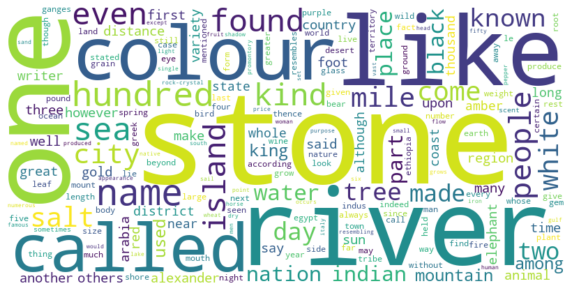

In [393]:
#| label: fig-freqwords_wordcloud
#| fig-cap: Top 1% frequent words in Indian subcontinent related text as word cloud

from wordcloud import WordCloud
# top_words contains the list of (word, count) tuples
wordcloud_data = {word: count for word, count in top_words}

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud from the word frequency data
wordcloud.generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()

As depicted in the visualizations, the words "stone," "river," and "color" notably stand out, suggesting their prominence in the narrative pertaining to the regions of the Indian subcontinent. This observation is indicative of the significant references to precious stones and the origins and transportation routes associated with the trade of such valuable commodities.

The collocating bi-grams associated with place names of the Indian subcontinent region are extracted based on the top 20 highest scores in the likelihood ration measurement. A higher likelihood ratio score indicates a stronger association or collocation between the words, suggesting that they are more likely to appear together in the given text. 

The extracted collocations undergo a filtering process that specifically includes those involving keywords of place names within the regions of the Indian subcontinent, whihc enables a focused analysis of collocations directly relevant to the geographic context.

In [399]:
keywords = ['India', 'Indus', 'Bactria', 'Ganges', 'Acesinus', 'Oxus', 'Hydaspes', 'Taprobane', 'Arachosia', 'Muziris', 'Baragaza', 'Aria', 'Ceylon']

finder = BigramCollocationFinder.from_documents(para)

for keyword in keywords:
    finder.apply_word_filter(lambda w: w == keyword.lower())

measures = BigramAssocMeasures()

finder.nbest(measures.likelihood_ratio, 20)

[('already', 'mentioned'),
 ('present', 'day'),
 ('alexander', 'great'),
 ('father', 'liber'),
 ('taken', 'drink'),
 ('formerly', 'called'),
 ('majesty', 'augustus'),
 ('fifty', 'mile'),
 ('late', 'majesty'),
 ('next', 'come'),
 ('roman', 'citizen'),
 ('mile', 'circumference'),
 ('human', 'being'),
 ('greek', 'name'),
 ('late', 'lamented'),
 ('marcus', 'varro'),
 ('one', 'hundred'),
 ('hundred', 'fifty'),
 ('rising', 'dog-star'),
 ('emperor', 'nero')]

Interestingly, in the flitered bi-grams, 20% of them are referring to human names or names of gods in myths (e.g. Alexander III, the Great (king of Macedon); Octavius Caesar Augustus (Roman Emperor); Nero (Roman emperor); Marcus Varro (ancient Latin scholar), Father Liber (referring to Dionysus, Greek god of winemaking and wine)).

As shown in the quotation of Book 16, Chapter 62, Paragraph 1, the word "India" was mentioned in the context of an introduction of a plant, as a counterpart in the plant origin, and as a conquered land intertwining with the historical story about how the plant was brought to Rome by Alexander the Great.  

>16.62.1  It is said that ivy now grows in Asia Minor. Theophrastus about 314 BC. had stated that it did not grow there, nor yet in **India** except on Mount Meros, and indeed that Harpalus had used every effort to grow it in Media without success, while **Alexander** had come back victorious from **India** with his army wearing wreaths of ivy, because of its rarity, in imitation of **Father Liber**; and it is even now used at solemn festivals among the peoples of Thrace to decorate the wands of that god, and also the worshippers' helmets and shields, although it is injurious to all trees and plants and destructive to tombs and walls, and very agreeable to chilly snakes, so that it is surprising that any honour has been paid to it.

\##(More detailed analysis and illustration will be further conducted for the pattern of interactions between Indian subcontinent place names and human names in the book. )

#### Topic modelling about Indian subcontinent region related texts

Since the corpus size for text pertaining Indian subcontient region is rather small, with certain tryouts, the the number of topics is set as 3 and the passes is set as 40 to get the most noon-overlapping topic clusters. 

The word "India" is excluded from the corpus in order to get more descriptive keywords which may contribe to a more concrete topic summary. 

The top 30 keywords for each topic, along with their respective weights, which rank their contributions to the topic is shown and visualized as follows.

In [404]:
## topic modelling about texts related to "India"

indiapara = tokenize_paragraphs(geotext_india['Text'].drop_duplicates())
indiapara = [[word for word in paragraph if word != 'india'] for paragraph in indiapara]

indiadictionary = corpora.Dictionary(indiapara)
indiacorpus = [indiadictionary.doc2bow(text) for text in indiapara]

indialdamodel = gensim.models.ldamodel.LdaModel(indiacorpus, num_topics=3, id2word = indiadictionary, passes=40)

pprint(indialdamodel.print_topics(num_topics=3, num_words=30))

[(0,
  '0.025*"stone" + 0.007*"also" + 0.007*"river" + 0.007*"found" + '
  '0.007*"colour" + 0.006*"like" + 0.005*"one" + 0.005*"name" + 0.005*"island" '
  '+ 0.005*"white" + 0.004*"hundred" + 0.004*"mile" + 0.004*"gold" + '
  '0.004*"variety" + 0.003*"come" + 0.003*"glass" + 0.003*"city" + '
  '0.003*"known" + 0.003*"many" + 0.003*"sea" + 0.003*"gem" + 0.003*"black" + '
  '0.003*"even" + 0.003*"nation" + 0.003*"thence" + 0.003*"place" + '
  '0.002*"according" + 0.002*"distance" + 0.002*"kind" + 0.002*"alexander"'),
 (1,
  '0.010*"also" + 0.006*"called" + 0.006*"one" + 0.005*"hundred" + '
  '0.005*"people" + 0.004*"name" + 0.004*"tree" + 0.004*"kind" + 0.004*"river" '
  '+ 0.004*"colour" + 0.004*"like" + 0.004*"city" + 0.003*"even" + '
  '0.003*"mile" + 0.003*"two" + 0.003*"black" + 0.003*"known" + 0.003*"island" '
  '+ 0.003*"used" + 0.003*"part" + 0.003*"amber" + 0.003*"indian" + '
  '0.003*"made" + 0.003*"foot" + 0.003*"come" + 0.003*"mountain" + 0.003*"sea" '
  '+ 0.002*"make" + 0.

In [405]:
# Convert the LdaModel object to a pyLDAvis-compatible format
vis_dataindia = pyLDAvis.gensim_models.prepare(indialdamodel, indiacorpus, indiadictionary)

# Enable the Jupyter notebook inline display of visualizations
pyLDAvis.enable_notebook()

# Display the pyLDAvis visualization
pyLDAvis.display(vis_dataindia)

C:\Users\dawn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


The three generated topics for the Indian subcontinent related texts can be summarized based on the dominant words as follows: 

Topic 1: **Stones, Rivers, and Islands** - various elements related to stones, rivers, and islands. It also touches upon the notion of distance and the mention of gold and gems.

Topic 2: **Cities, Trees, and Natural Features** - cities, trees, and natural features. It also mentions amber, mountains, and the connection to Arabia.

Topic 3: **Salt, Sea, and Water** - salt, the sea, and water-related concepts. It also touches upon topics such as animals, Alexander the Great, and the notion of a country.

And Topic 1: **Stones, Rivers, and Islands** takes the forefront among the other topics.

Consistent with the findings in the frequency list of the corpus, it is evident that "stones" and "rivers" hold a significant presence in the narrative concerning the Indian subcontinent.

##### Network analysis about Indian subcontinent region related texts

Two separate network analyses were conducted. The first analysis focused on exploring the relationships between place names mentioned throughout the entire book. The second analysis specifically examined the name entities of people and place names associated with the Indian subcontinent regions. Nodes and edges were generated for both analyses and imported into Gephi for visualization. By studying the clustering patterns of place names and people in the resulting network graphs, valuable insights can be gained into both the overall context of the book and the specific context of the Indian subcontinent within *Natural History*.

In [18]:
# define a function for generating the edge data for co-occurence of two places in a same paragraph
def place_name_edge (inputdf):
    
    co_occurrence = pd.DataFrame(columns=['source', 'target'])
    
    for i in range(len(inputdf)):
        for j in range(i+1, len(inputdf)):
            place1 = inputdf['Place_Name'].iloc[i]
            place2 = inputdf['Place_Name'].iloc[j]
            
            if place1 == place2:
                continue
                
            if geotext_whole['Book'].iloc[i] == geotext_whole['Book'].iloc[j]:
                if geotext_whole['Chapter'].iloc[i] == geotext_whole['Chapter'].iloc[j]:
                    if geotext_whole['Paragraph'].iloc[i] == geotext_whole['Paragraph'].iloc[j]:
                        co_occurrence = pd.concat([co_occurrence, pd.DataFrame({'source': [place1], 'target': [place2]})], ignore_index=True)
    return co_occurrence

# store the edges and nodes generated for network analysis about place names in the entire book

geonameco = place_name_edge(geotext_whole)

geonameco.rename(columns={'Place1': 'source', 'Place2': 'target'}, inplace=True)
geonameco.to_csv('geonameco.csv', index=False)

unique_places = pd.DataFrame(geotext_whole['Place_Name'].drop_duplicates()).rename(columns={'Place_Name': 'id'})
unique_places['label'] = unique_places['id']
unique_places.to_csv('place_nodes.csv', index=False)

In [417]:
#| echo: false

node_count1 = len(unique_places)
edge_count1 = len(geonameco)

display(Markdown("""In the network analysis for place names throughout the entire book, unique place names are seen as nodes, 
and once two place names co-occur in the same paragraph, it will be counted as one edge. There are total {node_count} nodes and {edge_count} edges
in the prepared data.
""".format(node_count = node_count1, edge_count = edge_count1)))


In the network analysis for place names throughout the entire book, unique place names are seen as nodes, 
and once two place names co-occur in the same paragraph, it will be counted as one edge. There are total 2255 nodes and 52602 edges
in the prepared data.


As shown in @fig-geoname_network, the size of the node represents the betweeness centrality a place name mentioned in the book, and the weight of edge between two nodes represents the time the two place names appeared in the same paragraph (as seen in the same context). Gone through a Force Atlas 2 layout algorithm, the graph also demonstrates the rough cluster of place names which tend to be mentioned together. 

In the case of "India", it is observed mostly incooperates with "Egypt", "Arabia" and "Nille", which tend to be appearing in the description of trading route.

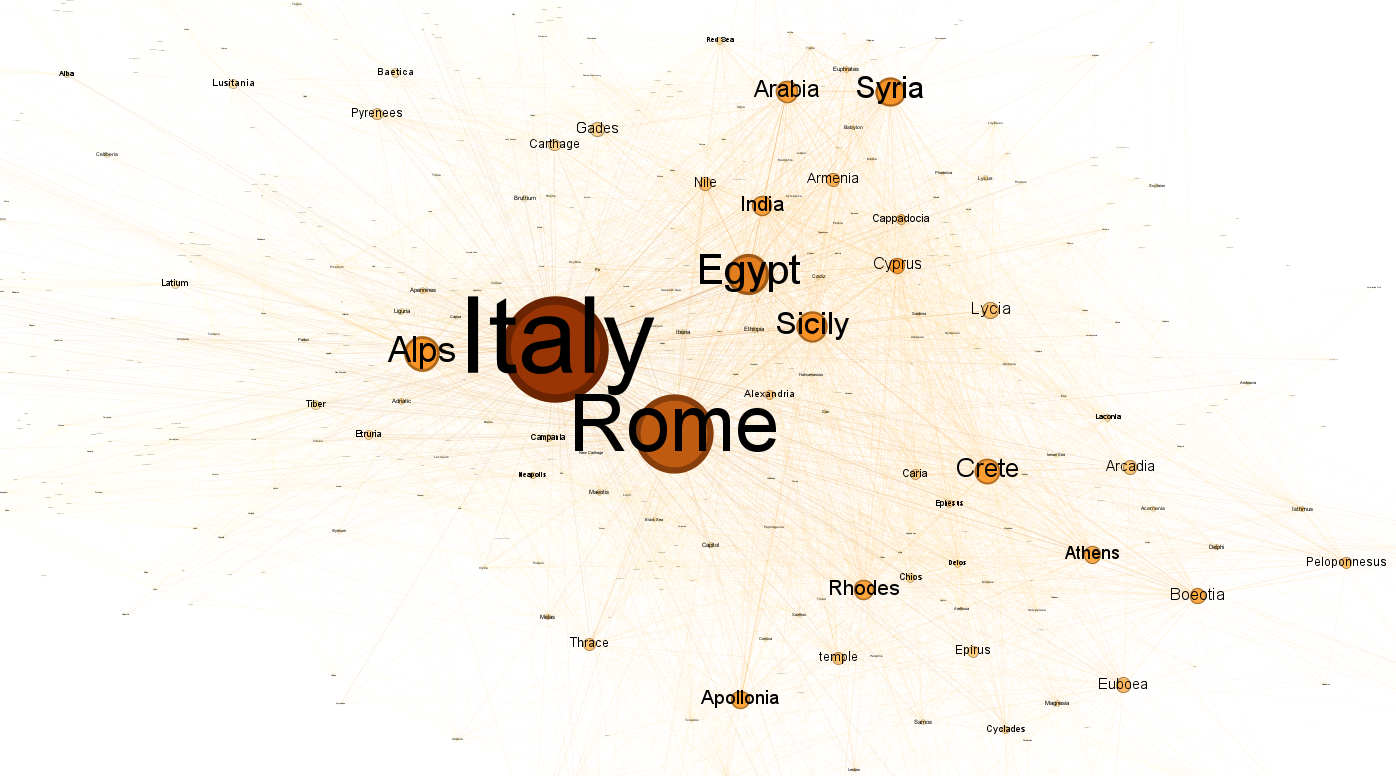

In [63]:
#| label: fig-geoname_network
#| fig-cap: Network graph for place namesmentioned in Natural History

from IPython.display import Image
Image(filename='geonamenw.png')

To gain a more detailed cluster of narrative contents about Indian subcontinent in *Natural History*, the idea is to generate a network for book number, place names and person names in the target corpus. The person name nodes are retrieved from the tagging of text given by the pretrained multilingual Name Entity Recognition model [WikiNEuRal](https://huggingface.co/Babelscape/wikineural-multilingual-ner) [@tedeschi2021]. 

\##(will further compare with scraping  person name annotations from ToposText, to see which way gets more accurate information.)

In [7]:
#| echo: false

#set pipeline for the NER model

from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")

# changed to "device = cpu" for not having a discrete GPU 
ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first", device="cpu")

In [68]:
#| echo: false
#| output: false

example = " Perfumes serve the purpose of the most superfluous of all forms of luxury; for pearls and jewels do nevertheless pass to the wearer's heir, and clothes last for some time, but unguents lose their scent at once, and die in the very hour when they are used. Their highest recommendation is that when a woman passes by her scent may attract the attention even of persons occupied in something else — and their cost is more than 400 denarii per pound! All that money is paid for a pleasure enjoyed by somebody else, for a person carrying scent about him does not smell it himself. Still, if even these matters deserve to be graded after a fashion, we find in the works left by Marcus Cicero that unguents that have an earthy scent are more agreeable than those smelling of saffron, inasmuch as even in a class of things where corruption is most rife, nevertheless some degree of strictness in vice itself gives more enjoyment. But there are people who get most pleasure from unguent of a dense consistency, which they call thick essence, and who enjoy smearing themselves with perfume and not merely pouring it over them. We have even seen people put scent on the soles of their feet, a practice said to have been taught to the emperor Nero by Marcus Otho; pray, how could it be noticed or give any pleasure from that part of the body? Moreover, we have heard that somebody of private station gave orders for the walls of his bathroom to be sprinkled with scent, and that the Emperor Caligula had the bathtubs scented, and so also later did one of the slaves of Nero — so that this must not be considered a privilege of princes! Yet what is most surprising is that this indulgence has found its way even into the camp: at all events the eagles and the standards, dusty as they are and bristling with sharp points, are anointed on holidays — and I only wish we were able to say who first introduced this custom! No doubt the fact is that our eagles were bribed by this reward to conquer the world! We look to their patronage forsooth to sanction our vices, so as to have this legitimation for using hair-oil under a helmet!"
ner_results = ner(example)
print(ner_results)

[{'entity_group': 'PER', 'score': 0.9917679, 'word': 'Marcus Cicero', 'start': 674, 'end': 687}, {'entity_group': 'PER', 'score': 0.9901232, 'word': 'Nero', 'start': 1233, 'end': 1237}, {'entity_group': 'PER', 'score': 0.99782413, 'word': 'Marcus Otho', 'start': 1241, 'end': 1252}, {'entity_group': 'PER', 'score': 0.9741029, 'word': 'Caligula', 'start': 1481, 'end': 1489}, {'entity_group': 'PER', 'score': 0.991039, 'word': 'Nero', 'start': 1559, 'end': 1563}]


The tags for name entity groups retrieved from WikiNEuRal model is appended as a new column in the corpus dataframe. And the tags as "PER", which means "person name" are further extracted as another column. 

In [8]:
#| df-print: tibble

# apply the NER model to the Indian subcontinent related texts and store the retrieved tags in a new column 
geotext_india['Text_ner'] =  geotext_india['Text'].progress_apply(ner)

# append the words with tag as "PER" i.e. person name into the dataframe
geotext_india['PER_names'] = geotext_india['Text_ner'].apply(lambda x: [entity['word'] for entity in x if entity['entity_group'] == 'PER'])
geotext_india[['Place_Name','Book','Chapter','Paragraph','Text_ner','PER_names']].head()

100%|██████████| 241/241 [07:05<00:00,  1.77s/it]
C:\Users\dawn\AppData\Local\Temp\ipykernel_4060\3949739019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geotext_india['Text_ner'] =  geotext_india['Text'].progress_apply(ner)
C:\Users\dawn\AppData\Local\Temp\ipykernel_4060\3949739019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geotext_india['PER_names'] = geotext_india['Text_ner'].apply(lambda x: [entity['word'] for entity in x if entity['entity_group'] == 'PER'])


Place_Name  Book  Chapter  Paragraph  \
85       India     2       75        1.0   
92       India     2       75        1.0   
93       India     2       75        1.0   
218      Indus     2       98        1.0   
326    Bactria     2      110        1.0   

                                              Text_ner  \
85   [{'entity_group': 'LOC', 'score': 0.99636984, ...   
92   [{'entity_group': 'LOC', 'score': 0.99636984, ...   
93   [{'entity_group': 'LOC', 'score': 0.99636984, ...   
218  [{'entity_group': 'LOC', 'score': 0.999539, 'w...   
326  [{'entity_group': 'LOC', 'score': 0.87196684, ...   

                                            PER_names  
85   [Onesicritus, Alexander, Alexander, Onesicritus]  
92   [Onesicritus, Alexander, Alexander, Onesicritus]  
93   [Onesicritus, Alexander, Alexander, Onesicritus]  
218                                                []  
326                             [Ctesias, Theopompus]

The rows containing no person name were dropped and those with multiple person name records were exploded to separate rows. 

In [9]:
#| df-print: tibble

geotext_india_exploded = geotext_india.explode('PER_names')
geotext_india_exploded.dropna(subset=['PER_names'], inplace=True)
geotext_india_exploded[['Place_Name', 'Book','PER_names']]

Place_Name  Book    PER_names
85        India     2  Onesicritus
85        India     2    Alexander
85        India     2    Alexander
85        India     2  Onesicritus
92        India     2  Onesicritus
...         ...   ...          ...
8842      India    37      Jupiter
8847      India    37   Xenocrates
8866      Indus    37   Democritus
8873      India    37       Nature
8873      India    37       Nature

[467 rows x 3 columns]

Within the Indian subcontinent context, the nodes consist of three types, namely **place name**, **person name** and **book number**. 

And there are four types of edges being recorded and combined, including the co-occurence of:

1. **place name** and **person name** in the same paragraph</br>
2. **person name** and **book number**</br>
3. **place name** and **book number**</br>
4. **place name** and **place name** in the same paragraph</br>

In [416]:
edge1 = geotext_india_exploded[['Place_Name', 'PER_names']]
edge1.rename(columns={'Place_Name': 'source', 'PER_names': 'target'}, inplace=True)

edge2 = geotext_india_exploded[['PER_names','Book']]
edge2.rename(columns={'PER_names': 'source', 'Book': 'target'}, inplace=True)

edge3 = geotext_india[['Place_Name', 'Book']]
edge3.rename(columns={'Place_Name': 'source', 'Book': 'target'}, inplace=True)

edge4 = place_name_edge(geotext_india)

# combine the four types of edges and save to .csv
combined_edge = pd.concat([edge1, edge2, edge3, edge4], axis=0)
combined_edge = combined_edge.reset_index(drop=True)
combined_edge.to_csv('indiatext_edge.csv', index=False)


node1 = pd.DataFrame(geotext_india['Place_Name'].drop_duplicates()).rename(columns={'Place_Name': 'id'})
node1['label'] = node1['id']
node1['type'] = 'Place_Name'

node2 = pd.DataFrame(geotext_india['Book'].drop_duplicates()).rename(columns={'Book': 'id'})
node2['label'] = 'Book ' + node2['id'].astype(str)
node2['type'] = 'Book'

node3 = pd.DataFrame(geotext_india_exploded['PER_names'].drop_duplicates()).rename(columns={'PER_names': 'id'})
node3['label'] = node3['id']
node3['type'] = 'Person_Name'

# combine the three types of nodes and save to .csv
combined_node = pd.concat([node1, node2, node3], axis=0)
combined_node = combined_node.reset_index(drop=True)
combined_node.to_csv('indiatext_node.csv', index=False)

node_count2 = len(combined_node)
edge_count2 = len(combined_edge)

display(Markdown("""In the network analysis for place names and person names within the Indian subcontinent context, there are total {node_count} nodes 
and {edge_count} edges in the prepared data.
""".format(node_count = node_count2, edge_count = edge_count2)))


C:\Users\dawn\AppData\Local\Temp\ipykernel_10756\920134953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge1.rename(columns={'Place_Name': 'source', 'PER_names': 'target'}, inplace=True)
C:\Users\dawn\AppData\Local\Temp\ipykernel_10756\920134953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge2.rename(columns={'PER_names': 'source', 'Book': 'target'}, inplace=True)
C:\Users\dawn\AppData\Local\Temp\ipykernel_10756\920134953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In the network analysis for place names and person names within the Indian subcontinent context, there are total 164 nodes 
and 1458 edges in the prepared data.


In [12]:
#| echo: false
edge1 = geotext_india_exploded[['Place_Name', 'PER_names']]

edge1.to_csv('NH_NG_place_person.csv')

In [14]:
#| echo: false
edge2 = geotext_india_exploded[['PER_names','Book']]

edge2.to_csv('NH_NG_person_book.csv')



In [17]:
#| echo: false
edge3 = geotext_india[['Place_Name', 'Book']]
edge3.to_csv('NH_NG_place_book.csv')

In [20]:
#| echo: false
edge4 = place_name_edge(geotext_india)
edge4.to_csv('NH_NG_place1_place2.csv')


In [22]:
#| echo: false
node1 = pd.DataFrame(geotext_india['Place_Name'].drop_duplicates()).rename(columns={'Place_Name': 'id'})
node1['label'] = node1['id']
node1['type'] = 'Place_Name'
node1.to_csv('NH_NG_placenode.csv')

In [24]:
#| echo: false
node2 = pd.DataFrame(geotext_india['Book'].drop_duplicates()).rename(columns={'Book': 'id'})
node2['label'] = 'Book ' + node2['id'].astype(str)
node2['type'] = 'Book'
node2.to_csv('NH_NG_booknode.csv')

In [27]:
#| echo: false
node3 = pd.DataFrame(geotext_india_exploded['PER_names'].drop_duplicates()).rename(columns={'PER_names': 'id'})
node3['label'] = node3['id']
node3['type'] = 'Person_Name'
node3.to_csv('NH_NG_personnode.csv')

As manifested in @fig-indiantext_clustering, there is obvious clustering of person names occuring in Indian subcontinent related texts. In other words, groups of person names are tend to be referenced in some specific topics. 

\##(more detailed illustration will be further conducted.)

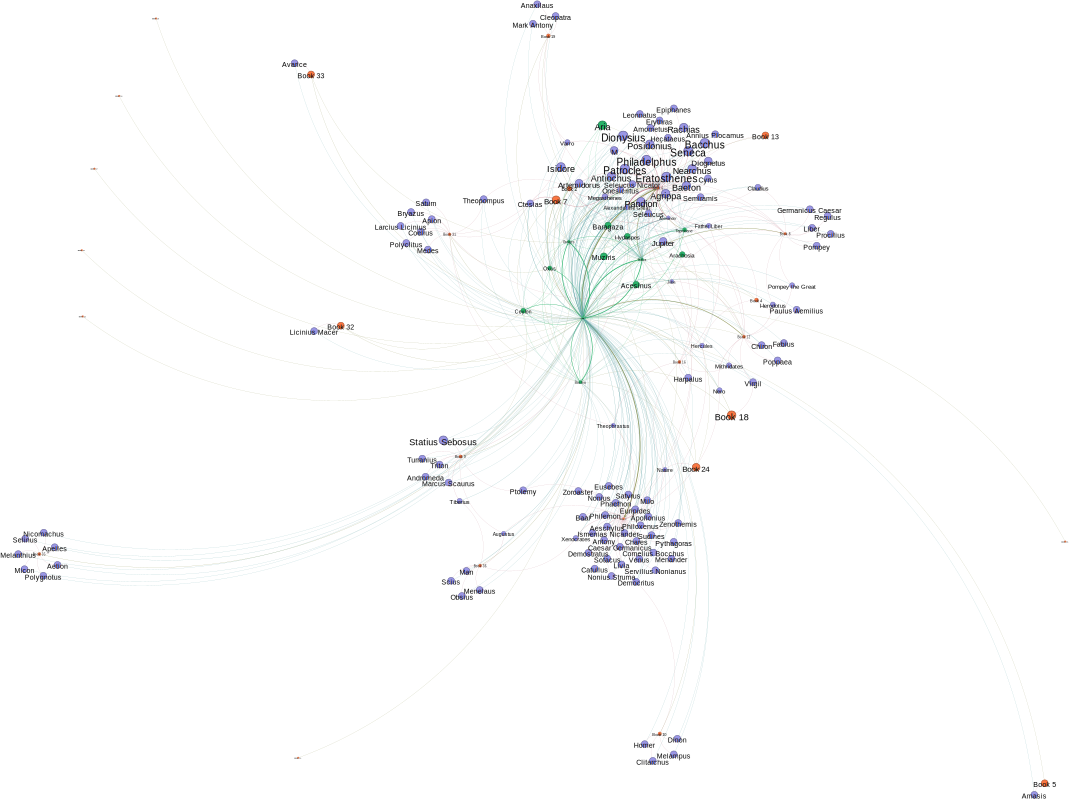

In [419]:
#| label: fig-indiantext_clustering
#| fig-cap: People reference referred in India-subcontinent related text in Natural History

from IPython.display import SVG

# Specify the path to your SVG file
svg_path = "india_person_nw.svg"

# Display the SVG file
SVG(filename=svg_path)